<a href="https://colab.research.google.com/github/woOONi/LIKELION_AIschool/blob/main/Mini2_EDA/mini2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 포항시 버스카드
### 라이브러리 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime

# 예쁘게 변경
sns.set_context('talk')
sns.set_palette("Set2")
sns.set_style('whitegrid')

### 파일리스트 불러오기

In [ ]:
import glob

input_path = "trfcard/*.csv"
filepath_list = [f for f in glob.glob(input_path)]
filepath_list

['trfcard\\trf-20200325.csv',
 'trfcard\\trfcard-20200326.csv',
 'trfcard\\trfcard-20200327.csv',
 'trfcard\\trfcard-20200328.csv',
 'trfcard\\trfcard-20200329.csv',
 'trfcard\\trfcard-20200330.csv',
 'trfcard\\trfcard-20200331.csv',
 'trfcard\\trfcard.csv']

# 파일 가져오기

In [ ]:
# 리스트로 파일 받기
# file_list = [pd.read_csv(i) for i in filepath_list]

# # concat으로 파일 합치기
# df = pd.concat(file_list,ignore_index=True)
df = pd.read_csv("trfcard/trfcard.csv")
cols = ['승차시각','하차시각','노선명','노선설명','승객연령','환승여부','추가운임여부',
        '승차정류장','승차정류장 GPS X','승차정류장 GPS Y','하차정류장','하차정류장 GPS X','하차정류장 GPS Y']
df.columns = cols

# 승차시각으로 정신없는 df 정리하기
df = df.sort_values('승차시각')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36718 entries, 0 to 36717
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   승차시각         36718 non-null  int64  
 1   하차시각         36718 non-null  int64  
 2   노선명          36718 non-null  object 
 3   노선설명         36718 non-null  object 
 4   승객연령         36718 non-null  object 
 5   환승여부         36718 non-null  object 
 6   추가운임여부       36718 non-null  object 
 7   승차정류장        36718 non-null  object 
 8   승차정류장 GPS X  36718 non-null  float64
 9   승차정류장 GPS Y  36718 non-null  float64
 10  하차정류장        36718 non-null  object 
 11  하차정류장 GPS X  36718 non-null  float64
 12  하차정류장 GPS Y  36718 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 3.9+ MB


### datetime

In [ ]:
# date 컬럼의 데이터 타입 변환
# datetime 형식으로 바꿔줄 컬럼을 불러옵니다.
col_datetime = ['승차시각','하차시각']

for col in col_datetime:
    # 먼저 int64로 되어있는 date컬럼의 데이터 타입을 문자열 형식으로 변환해 줍니다.
    # 데이터프레임 정보에서 Dtype이 object로 되어있는 컬럼의 데이터 타입은 문자열과 같습니다.
    df[col] = df[col].astype('str')
    # 판다스의 to_datetime()을 이용하여 datetime 형식으로 바꿔주고 날짜와 시간으로 나눠줍니다.
    df[col] = pd.to_datetime(df[col])

# 버스 탑승 시간 계산
df['탑승시간'] = df['하차시각']-df['승차시각']
display(df.head(1))
df.info()

,승차시각,하차시각,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,승차정류장 GPS X,승차정류장 GPS Y,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,탑승시간
0,2020-03-01 05:15:47,2020-03-01 05:19:50,160,문덕-대송-송도-죽도-용흥,일반,N,N,문덕사거리,129.403442,35.962846,성우오토모티브,129.384492,35.972675,0 days 00:04:03


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36718 entries, 0 to 36717
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   승차시각         36718 non-null  datetime64[ns] 
 1   하차시각         36718 non-null  datetime64[ns] 
 2   노선명          36718 non-null  object         
 3   노선설명         36718 non-null  object         
 4   승객연령         36718 non-null  object         
 5   환승여부         36718 non-null  object         
 6   추가운임여부       36718 non-null  object         
 7   승차정류장        36718 non-null  object         
 8   승차정류장 GPS X  36718 non-null  float64        
 9   승차정류장 GPS Y  36718 non-null  float64        
 10  하차정류장        36718 non-null  object         
 11  하차정류장 GPS X  36718 non-null  float64        
 12  하차정류장 GPS Y  36718 non-null  float64        
 13  탑승시간         36718 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(7), timedelta64[ns](1)
memory usage: 4.2+ MB


In [ ]:
# 요일 가져오기
df['요일'] = df['승차시각'].dt.weekday
# 월화수목금토일로 요일 바꿔주기
weekday_list = ['월', '화', '수', '목', '금', '토', '일']

# apply 함수로 숫자 -> 요일 이름으로 변환
df['요일'] = df.apply(lambda x : weekday_list[x['요일']], axis = 1)
df['요일'].unique()

array(['일', '월', '화', '수', '목', '금', '토'], dtype=object)

### 데이터 확인하기

In [ ]:
# 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36718 entries, 0 to 36717
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   승차시각         36718 non-null  datetime64[ns] 
 1   하차시각         36718 non-null  datetime64[ns] 
 2   노선명          36718 non-null  object         
 3   노선설명         36718 non-null  object         
 4   승객연령         36718 non-null  object         
 5   환승여부         36718 non-null  object         
 6   추가운임여부       36718 non-null  object         
 7   승차정류장        36718 non-null  object         
 8   승차정류장 GPS X  36718 non-null  float64        
 9   승차정류장 GPS Y  36718 non-null  float64        
 10  하차정류장        36718 non-null  object         
 11  하차정류장 GPS X  36718 non-null  float64        
 12  하차정류장 GPS Y  36718 non-null  float64        
 13  탑승시간         36718 non-null  timedelta64[ns]
 14  요일           36718 non-null  object         
dtypes: datetime64[ns](2), float64(4), ob

In [ ]:
# 데이터 크기
df.shape

(36718, 15)

In [ ]:
# 중복값 확인
df.duplicated().sum()

0

In [ ]:
# 결측치 확인
df.isnull().sum()

승차시각           0
하차시각           0
노선명            0
노선설명           0
승객연령           0
환승여부           0
추가운임여부         0
승차정류장          0
승차정류장 GPS X    0
승차정류장 GPS Y    0
하차정류장          0
하차정류장 GPS X    0
하차정류장 GPS Y    0
탑승시간           0
요일             0
dtype: int64

In [ ]:
# 결측치는 없지만 승객 연령에서 None값이 존재
df['승객연령'].value_counts()

# 데이터 사이트에 찾아봐도 보이지 않아서 연령대 조사에서 제거하기로 결정

일반      35051
청소년      1477
어린이       165
None       25
Name: 승객연령, dtype: int64

In [ ]:
# 데이터 통계치 확인
display(df.describe(include='O'))
display(df['탑승시간'].describe())

,노선명,노선설명,승객연령,환승여부,추가운임여부,승차정류장,하차정류장,요일
count,36718,36718,36718,36718,36718,36718,36718,36718
unique,56,80,4,2,2,638,551,7
top,105,양덕-시외터미널-지곡,일반,N,N,시외버스터미널,죽도시장,월
freq,4146,4146,35051,34379,36276,1720,6136,6545


count                        36718
mean     0 days 00:14:59.920366033
std      0 days 00:11:10.782886590
min                0 days 00:00:05
25%         0 days 00:07:01.250000
50%                0 days 00:12:11
75%                0 days 00:20:01
max                0 days 01:29:51
Name: 탑승시간, dtype: object

## 시각화
💡 3월 1~7일까지의 데이터를 가지고 시각화 해보자
### 요일 별 탑승인원 비율

In [ ]:
import koreanize_matplotlib #한글폰트
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<AxesSubplot:title={'center':'요일별 승객 수'}>

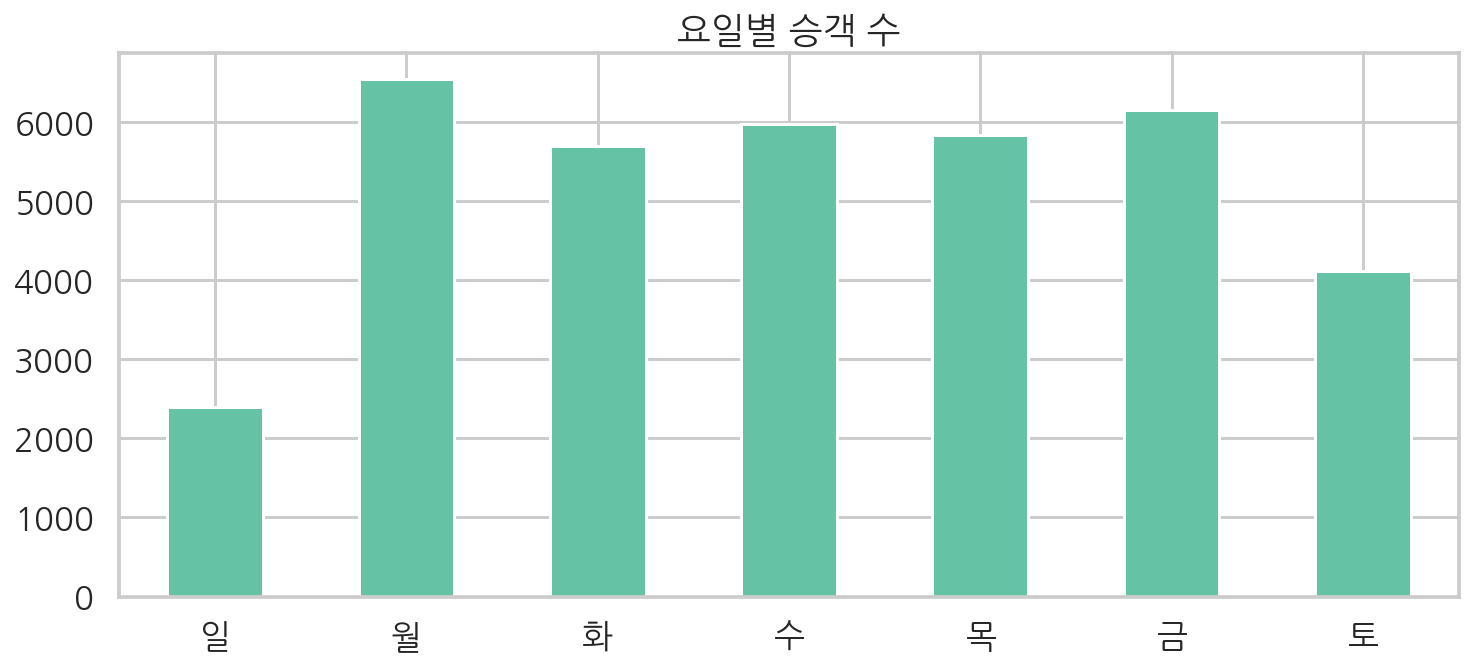

In [ ]:
df_weekday_counts = df['요일'].value_counts()
weekday_list = list('일월화수목금토')
df_weekday_counts[weekday_list].plot.bar(rot=0, figsize = (12,5), title = '요일별 승객 수')

📝 포항에서는 주말이나 공휴일에는 버스이용을 많이 하지 않고 평일날 가장 많이 이용한다.특히 월요일에 이용하는 승객수가 가장 많으며 금요일이 그 다음으로 많다.

왜지..?

<AxesSubplot:title={'center':'시간별 승객 수'}>

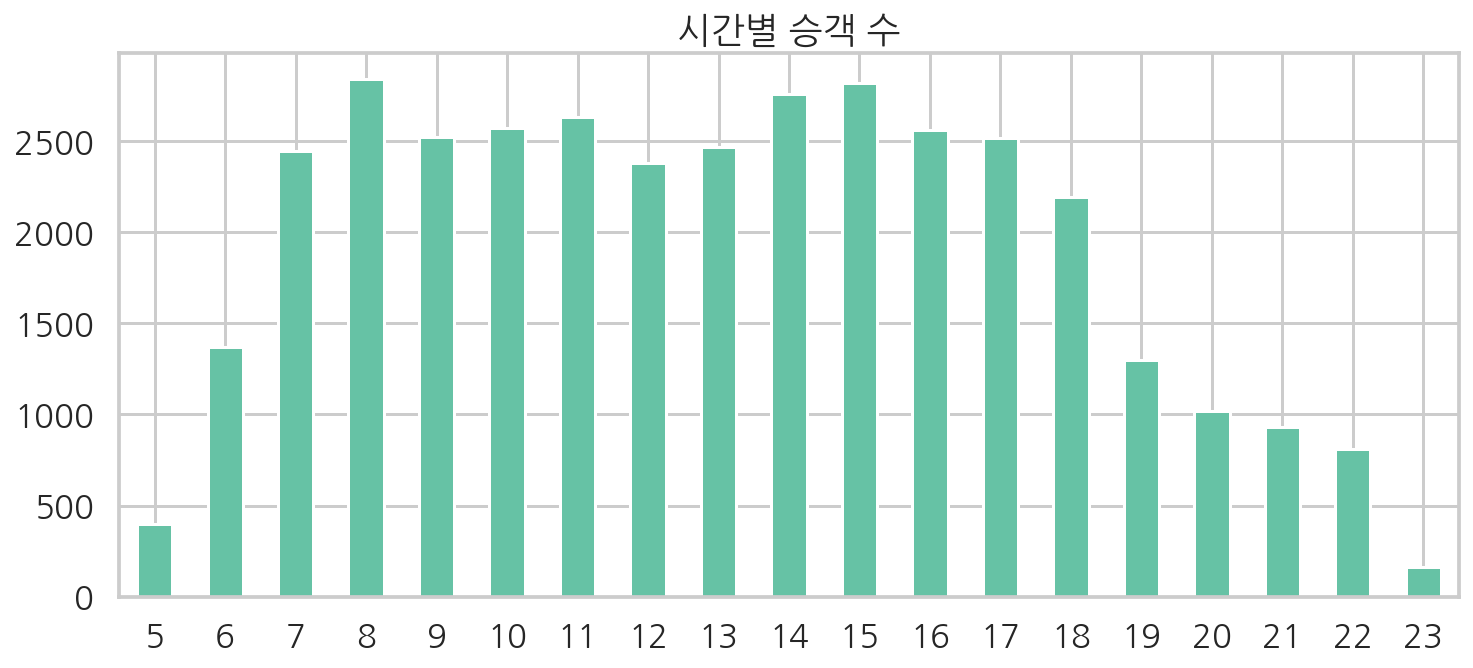

In [ ]:
df_hour = df['승차시각'].dt.hour.value_counts().sort_index()
df_hour.plot.bar(rot=0, figsize = (12,5), title = '시간별 승객 수')

In [ ]:
# 요일별 시간대별 승객 수
df_weekday_hour = pd.crosstab(index = df['승차시각'].dt.hour, columns = df['요일'])
df_weekday_hour.columns = weekday_list
df_weekday_hour[weekday_list].style.bar(color='lightgray')

,일,월,화,수,목,금,토
승차시각,,,,,,,
5,72,73,63,61,26,38,63
6,220,228,254,214,81,165,207
7,408,404,415,474,113,241,394
8,473,452,478,558,137,292,453
9,455,353,416,465,128,306,403
10,416,370,435,489,145,309,411
11,439,439,412,493,112,330,410
12,373,364,376,434,141,304,391
13,371,382,407,464,155,288,403


In [ ]:
df_bus = df.groupby(['하차정류장','하차정류장 GPS X','하차정류장 GPS Y'])['승차시각'].count()
df_busstop = df[['하차정류장','하차정류장 GPS X','하차정류장 GPS Y']].copy().drop_duplicates()
df_busmap = pd.merge(left = df_bus, right = df_busstop, how = 'left', left_on = ['하차정류장','하차정류장 GPS X','하차정류장 GPS Y'],
                    right_on = ['하차정류장','하차정류장 GPS X','하차정류장 GPS Y'])
df_busmap.columns = ['하차정류장','하차정류장 GPS X','하차정류장 GPS Y','Count']
df_busmap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 0 to 878
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   하차정류장        879 non-null    object 
 1   하차정류장 GPS X  879 non-null    float64
 2   하차정류장 GPS Y  879 non-null    float64
 3   Count        879 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 34.3+ KB


In [ ]:
for i in df_busmap.index:
    if df_busmap['Count'][i] > 1000:
        df_busmap['Size'] = 30
    elif df_busmap['Count'][i] > 100:
        df_busmap['Size'] = 20
    elif df_busmap['Count'][i] > 50:
        df_busmap['Size'] = 10
    elif df_busmap['Count'][i] > 20 :
        df_busmap['Size'] = 5
    else :
        df_busmap['Size'] = 1

df_busmap

,하차정류장,하차정류장 GPS X,하차정류장 GPS Y,Count,Size
0,GS슈퍼마켓,129.360253,36.025680,141,20
1,GS슈퍼마켓,129.360500,36.025700,163,20
2,HCN경북방송,129.378180,36.072156,36,20
3,HCN경북방송,129.378810,36.072060,100,20
4,KT&G,129.220108,35.992962,16,20
...,...,...,...,...,...
874,흥해중학교,129.343080,36.108094,7,20
875,흥해중학교,129.343247,36.108321,29,20
876,흥해파출소,129.347842,36.112102,3,20
877,흥해환승센터,129.347090,36.110240,514,20


In [ ]:
import folium
import json
import requests

In [ ]:
with open("skorea-submunicipalities-2018-geo_pohang.json", encoding='utf-8') as f:
    pohang_gu = json.load(f)

In [ ]:
포항위경도 = [36.0190178,129.3434808]
m = folium.Map(
    location=포항위경도,
    zoom_start=10.5,
    tiles='cartodbpositron'
)

folium.Choropleth(
    geo_data=pohang_gu,
    name="choropleth",
    fill_color='yellow',
    fill_opacity=0.1,
    line_color = 'green',
    line_opacity=1,
)

for n in df_busmap.index:
    folium.CircleMarker([df_busmap['하차정류장 GPS Y'][n], df_busmap['하차정류장 GPS X'][n]],
                        popup = df_busmap['하차정류장'][n],
                        radius = 0.5*df_busmap['Size'][n], color = 'blue',fill_color='blue').add_to(m)
m